<a href="https://colab.research.google.com/github/sh-0620/solar/blob/main/solar_weather_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data_path = '/Users/parkseohee/Documents/서희/태양광/'

In [ ]:
df = pd.read_csv(data_path + 'solar_weather.csv', index_col = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1551
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일자         1552 non-null   object 
 1   교래태양광      1552 non-null   object 
 2   종합경기장태양광   1552 non-null   object 
 3   행원태양광      1552 non-null   float64
 4   홍보관주차장태양광  1552 non-null   float64
 5   수산태양광      548 non-null    float64
 6   전체         1368 non-null   object 
 7   si_day     1552 non-null   object 
 8   ps         1549 non-null   float64
 9   ss_day     1552 non-null   object 
 10  hm         1549 non-null   float64
 11  ta_max     1552 non-null   float64
 12  ev_s       0 non-null      float64
 13  ca_tot     1549 non-null   float64
 14  tg_min     1552 non-null   float64
 15  wd_max     1552 non-null   object 
 16  ta         1548 non-null   float64
 17  td         1548 non-null   float64
 18  ws_max     1552 non-null   float64
 19  ta_min     1552 non-null   float64
 20  tm      

In [ ]:
df.drop(['수산태양광','전체','tm'], axis = 1)

,일자,교래태양광,종합경기장태양광,행원태양광,홍보관주차장태양광,si_day,ps,ss_day,hm,ta_max,...,wd_max,ta,td,ws_max,ta_min,sd_new,rn_day,hm_min,ws,sd_max
0,2020-01-01,1559.8,412.832,423.432,0.00,3.86,1032.8,0.1,63.0,7.3,...,NNE,5.2,-1.3,4.9,2.4,NaN,NaN,54,2.5,NaN
1,2020-01-02,624.6,257.312,176.328,0.00,2.17,1030.0,0.0,67.0,9.2,...,NW,8.1,2.2,3.6,5.5,NaN,NaN,62,1.9,NaN
2,2020-01-03,756.6,543.296,726.480,340.12,4.96,1027.3,0.5,67.0,11.4,...,WNW,8.8,2.9,4.6,6.4,NaN,NaN,60,2.3,NaN
3,2020-01-04,2071.8,1579.136,917.064,267.60,10.1,1026.6,6.1,67.0,11.4,...,WNW,7.9,1.9,4.3,5.1,NaN,NaN,55,2.2,NaN
4,2020-01-05,1804.0,1449.792,867.024,250.12,9.79,1029.2,5.2,62.0,11.1,...,NE,8.5,1.4,3.9,4.3,NaN,NaN,44,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2024-03-27,2048.2,1909.76,481.464,352.48,17.7,1022.2,6.4,64.0,19.5,...,WSW,13.4,6.4,6.7,8.0,NaN,NaN,39,2.8,NaN
1548,2024-03-28,270.8,208.832,2.880,32.68,1.29,1009.0,0.0,81.0,15.2,...,W,13.2,9.9,7.2,11.7,NaN,9.3,66,3.5,NaN
1549,2024-03-29,2919.2,2282.336,625.680,473.48,21.84,1010.8,10.0,64.0,22.3,...,W,15.2,7.5,11.5,8.9,NaN,NaN,18,4.7,NaN
1550,2024-03-30,2536.2,1885.824,228.888,385.04,18.49,1012.0,9.8,65.0,26.7,...,WSW,17.4,9.9,7.8,11.8,NaN,NaN,27,3.1,NaN


In [ ]:
df.교래태양광 = df.교래태양광.str.replace(',','')

In [ ]:
df.종합경기장태양광 = df.종합경기장태양광.str.replace(',','')

In [ ]:
df.교래태양광 = df.교래태양광.astype('float64')

In [ ]:
df.종합경기장태양광 = df.종합경기장태양광.astype('float64')

In [ ]:
import pandas as pd

# si_day 열의 값을 음수로 변환
def convert_to_negative(value):
    try:
        if value.startswith('-'):
            return -float(value[1:])
        else:
            return float(value)
    except ValueError:
        return None  # 변환할 수 없는 경우 NaN 반환

# si_day 열의 '-' 처리 및 변환
df['si_day'] = df['si_day'].apply(convert_to_negative)
df['ss_day'] = df['ss_day'].apply(convert_to_negative)

# 변환된 데이터 확인
print(df['si_day'])


0        3.86
1        2.17
2        4.96
3       10.10
4        9.79
        ...  
1547    17.70
1548     1.29
1549    21.84
1550    18.49
1551     7.97
Name: si_day, Length: 1552, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1551
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일자         1552 non-null   object 
 1   교래태양광      1552 non-null   float64
 2   종합경기장태양광   1552 non-null   float64
 3   행원태양광      1552 non-null   float64
 4   홍보관주차장태양광  1552 non-null   float64
 5   수산태양광      548 non-null    float64
 6   전체         1368 non-null   object 
 7   si_day     1549 non-null   float64
 8   ps         1549 non-null   float64
 9   ss_day     1549 non-null   float64
 10  hm         1549 non-null   float64
 11  ta_max     1552 non-null   float64
 12  ev_s       0 non-null      float64
 13  ca_tot     1549 non-null   float64
 14  tg_min     1552 non-null   float64
 15  wd_max     1552 non-null   object 
 16  ta         1548 non-null   float64
 17  td         1548 non-null   float64
 18  ws_max     1552 non-null   float64
 19  ta_min     1552 non-null   float64
 20  tm      

In [ ]:
df = df.fillna(0)

In [ ]:
df_ryfo = df.drop(['종합경기장태양광','행원태양광','홍보관주차장태양광','수산태양광','전체','tm'], axis = 1)

In [ ]:
df_ryfo_train = df_ryfo[:-50]

In [ ]:
df_ryfo_train

,일자,교래태양광,si_day,ps,ss_day,hm,ta_max,ev_s,ca_tot,tg_min,wd_max,ta,td,ws_max,ta_min,sd_new,rn_day,hm_min,ws,sd_max
0,2020-01-01,1559.8,3.86,1032.8,0.1,63.0,7.3,0.0,9.0,2.2,NNE,5.2,-1.3,4.9,2.4,0.0,0.0,54,2.5,0.0
1,2020-01-02,624.6,2.17,1030.0,0.0,67.0,9.2,0.0,8.3,1.9,NW,8.1,2.2,3.6,5.5,0.0,0.0,62,1.9,0.0
2,2020-01-03,756.6,4.96,1027.3,0.5,67.0,11.4,0.0,6.4,0.0,WNW,8.8,2.9,4.6,6.4,0.0,0.0,60,2.3,0.0
3,2020-01-04,2071.8,10.10,1026.6,6.1,67.0,11.4,0.0,2.0,-0.5,WNW,7.9,1.9,4.3,5.1,0.0,0.0,55,2.2,0.0
4,2020-01-05,1804.0,9.79,1029.2,5.2,62.0,11.1,0.0,6.0,-2.0,NE,8.5,1.4,3.9,4.3,0.0,0.0,44,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2024-02-06,598.4,0.85,1024.7,0.0,68.0,8.1,0.0,9.8,5.9,NNE,7.3,1.6,5.7,6.8,0.0,2.3,56,3.4,0.0
1498,2024-02-07,849.8,5.32,1023.5,0.8,58.0,7.4,0.0,8.0,1.9,NNW,5.7,-1.9,5.3,4.4,0.0,0.0,52,3.8,0.0
1499,2024-02-08,1074.6,4.76,1021.9,0.5,58.0,6.9,0.0,8.4,2.2,NNE,5.4,-2.2,5.3,4.3,0.0,0.0,51,3.4,0.0
1500,2024-02-09,887.2,3.76,1023.3,0.4,54.0,8.0,0.0,8.0,3.8,NW,6.4,-2.3,6.1,5.6,0.0,0.0,47,4.3,0.0


In [ ]:
df_ryfo_test = df_ryfo[-50:]

In [ ]:
df_ryfo_test

,일자,교래태양광,si_day,ps,ss_day,hm,ta_max,ev_s,ca_tot,tg_min,wd_max,ta,td,ws_max,ta_min,sd_new,rn_day,hm_min,ws,sd_max
1502,2024-02-11,1726.2,10.05,1026.6,5.7,49.0,11.8,0.0,2.1,0.4,WNW,8.7,-1.6,8.7,6.1,0.0,0.0,30,5.0,0.0
1503,2024-02-12,2575.6,15.19,1029.9,9.8,54.0,14.6,0.0,0.0,-1.4,NW,8.9,-0.3,4.6,4.3,0.0,0.0,29,2.3,0.0
1504,2024-02-13,2509.4,15.63,1026.7,10.1,53.0,19.7,0.0,2.4,0.8,SW,12.8,3.2,7.3,6.2,0.0,0.0,27,2.7,0.0
1505,2024-02-14,512.2,3.28,1021.5,0.0,71.0,18.2,0.0,6.8,7.5,SW,15.7,10.3,4.0,12.9,0.0,0.3,50,1.8,0.0
1506,2024-02-15,659.8,1.33,1020.5,0.8,73.0,15.9,0.0,6.0,2.6,NNW,9.4,4.6,8.2,5.2,0.0,0.0,45,4.0,0.0
1507,2024-02-16,1629.4,9.08,1024.1,4.4,64.0,9.8,0.0,4.8,-1.2,NNE,6.7,0.3,4.7,3.4,0.0,0.0,53,2.7,0.0
1508,2024-02-17,2813.8,17.02,1021.2,10.4,61.0,16.8,0.0,0.1,-0.9,NE,9.7,2.5,5.0,4.1,0.0,0.0,41,2.6,0.0
1509,2024-02-18,114.0,3.06,1016.3,0.3,66.0,20.6,0.0,8.4,3.6,SSW,15.3,8.9,9.7,8.2,0.0,2.8,51,2.9,0.0
1510,2024-02-19,1912.2,3.29,1014.0,0.8,83.0,20.7,0.0,8.6,10.5,SW,15.1,12.1,12.1,10.4,0.0,1.4,71,5.8,0.0
1511,2024-02-20,198.0,0.62,1018.9,0.0,86.0,13.9,0.0,10.0,9.0,E,11.0,8.7,5.7,8.7,0.0,4.7,80,3.1,0.0


In [ ]:
df_ryfo_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1502 non-null   object 
 1   교래태양광   1502 non-null   float64
 2   si_day  1502 non-null   float64
 3   ps      1502 non-null   float64
 4   ss_day  1502 non-null   float64
 5   hm      1502 non-null   float64
 6   ta_max  1502 non-null   float64
 7   ev_s    1502 non-null   float64
 8   ca_tot  1502 non-null   float64
 9   tg_min  1502 non-null   float64
 10  wd_max  1502 non-null   object 
 11  ta      1502 non-null   float64
 12  td      1502 non-null   float64
 13  ws_max  1502 non-null   float64
 14  ta_min  1502 non-null   float64
 15  sd_new  1502 non-null   float64
 16  rn_day  1502 non-null   float64
 17  hm_min  1502 non-null   int64  
 18  ws      1502 non-null   float64
 19  sd_max  1502 non-null   float64
dtypes: float64(17), int64(1), object(2)
memory usage: 246.4+ KB


In [ ]:
X= df_ryfo_train.drop(['교래태양광','일자','wd_max'], axis = 1)
y= df_ryfo_train.교래태양광

In [ ]:
test_x= df_ryfo_test.drop(['교래태양광','일자','wd_max'], axis = 1)
test_y= df_ryfo_test.교래태양광

In [ ]:
# pip install scikit-learn

In [ ]:
# pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 초기화 및 학습
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 158271.55984699604
R^2 Score: 0.8142083280342594


In [ ]:
pred_y = model.predict(test_x)

In [ ]:
r2 = r2_score(test_y, pred_y)

In [ ]:
r2

0.8632572604470237

In [ ]:
pred_y

array([2008.4474 , 2387.5664 , 2360.8005 ,  876.1692 ,  921.98083,
       1506.7955 , 2670.1733 ,  564.87506,  629.54126,  234.81134,
        432.7551 ,  253.85864,  390.44238,  434.1376 ,  432.2978 ,
       2167.301  , 2234.2131 ,  924.98236,  158.8117 ,  665.19727,
       2357.7634 , 1327.245  , 1035.9172 ,  153.7257 ,  796.2177 ,
       2352.3945 , 2371.4756 , 2865.899  , 3065.531  , 1039.975  ,
        951.9642 , 3086.146  , 2459.9714 , 3022.6033 , 2076.2498 ,
        870.3796 , 2601.1394 , 2485.262  , 2724.5142 , 3266.3853 ,
       2660.5198 , 1904.178  ,  414.17038,  699.88293,  338.97794,
       2219.9067 ,  357.4434 , 2665.6536 , 2439.7566 , 1371.9514 ],
      dtype=float32)

In [ ]:
test_y.values

array([1726.2, 2575.6, 2509.4,  512.2,  659.8, 1629.4, 2813.8,  114. ,
       1912.2,  198. ,  199.4,  196.6,  212.4,  180.4,  349.4, 2275.6,
        763.2,  903.2,  155.6,  939. , 2490.2, 1155.8,  828. ,  120.4,
        441.8, 2535.4, 2431.6, 3080. , 2532. ,  683.2, 1408.4, 3052.8,
       2261.8, 2950.8, 2189.2, 1010. , 2865.6, 2444.4, 3022.8, 3269.8,
       1665.8, 1411.8,  240.8,  162.8,  501. , 2048.2,  270.8, 2919.2,
       2536.2, 1056.2])

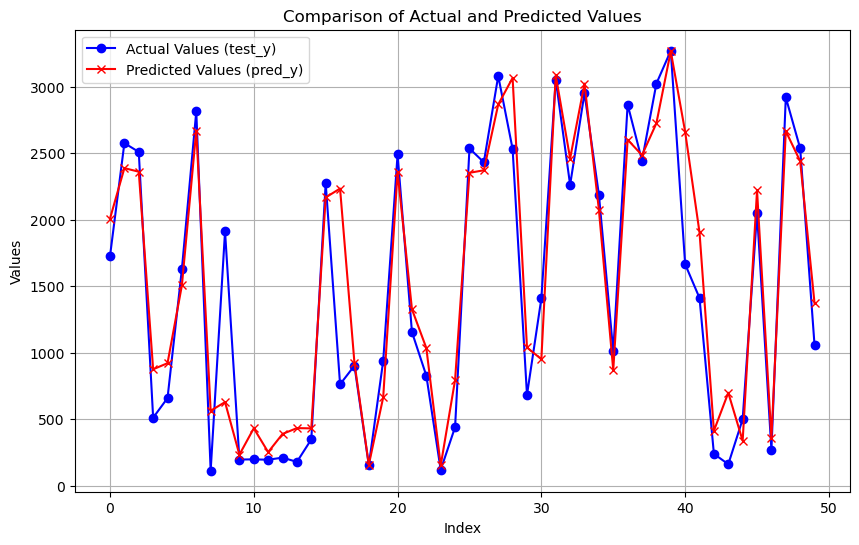

In [ ]:
import matplotlib.pyplot as plt

# pred_y와 test_y 값을 시각화
plt.figure(figsize=(10, 6))

# test_y 값 플로팅
plt.plot(test_y.values, label='Actual Values (test_y)', color='blue', marker='o')

# pred_y 값 플로팅
plt.plot(pred_y, label='Predicted Values (pred_y)', color='red', marker='x')

# 그래프 제목 및 레이블 추가
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# 범례 추가
plt.legend()

# 그래프 출력
plt.grid(True)
plt.show()
